In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

**Leer dataset con pandas**

In [2]:
filename = 'data/WorldWealth.xlsx'
df = pd.read_excel(filename)
df.head()

,Country,Region,Wealth ($B)
0,United States,North America,"$105,990"
1,China,China,"$63,827"
2,Japan,Asia-Pacific,"$24,992"
3,Germany,Europe,"$14,660"
4,United Kingdom,Europe,"$14,341"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      214 non-null    object
 1   Region       206 non-null    object
 2   Wealth ($B)  205 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


**Renombrar columnas y conversión de la columna Wealth de string a float**

In [4]:
df.columns # Ver los nombres actuales de las columnas

Index(['Country', 'Region', 'Wealth ($B)'], dtype='object')

In [5]:
df = df.rename ( columns = {'Wealth ($B)':'Wealth'} ) # Renombrar columna 'Wealth ($B)' para facilitar el majo de los datos
df.columns # Ver los nombres actuales de las columnas actualizado

Index(['Country', 'Region', 'Wealth'], dtype='object')

In [6]:
# Función para eliminar el signo de dolar y la coma de la columna 'Wealth'
# La función devuelve el valor reemplazado y convertido a tipo flotante.
def replace_dolar_comma(x:str):
    if(isinstance(x,(str))):
        x = x.replace('$','') # Eliminar signo de dólar
        x = x.replace(',','') # Eliminar comas
    return float(x) # Convertir a tipo flotante

# Aplicar la funcion replace_dolar_comma a cada celda de la columna Wealth
df['Wealth'] = df['Wealth'].apply(replace_dolar_comma)  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  214 non-null    object 
 1   Region   206 non-null    object 
 2   Wealth   205 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.1+ KB


# Gráficos

**Gráfico de los 20 paises más ricos**

In [7]:
dftop20 = df.copy() #Hacer copia del dataset por valor.

In [8]:
dftop20 = dftop20.sort_values('Wealth',ascending=False).head(20)
dftop20

,Country,Region,Wealth
0,United States,North America,105990.0
1,China,China,63827.0
2,Japan,Asia-Pacific,24992.0
3,Germany,Europe,14660.0
4,United Kingdom,Europe,14341.0
5,France,Europe,13729.0
6,India,India,12614.0
7,Italy,Europe,11358.0
8,Canada,North America,8573.0
9,Spain,Europe,7772.0


## Gráfico de barras de los 20 paises más ricos del mundo

Text(0, 0.5, 'Riqueza en miles de miles de millones.')

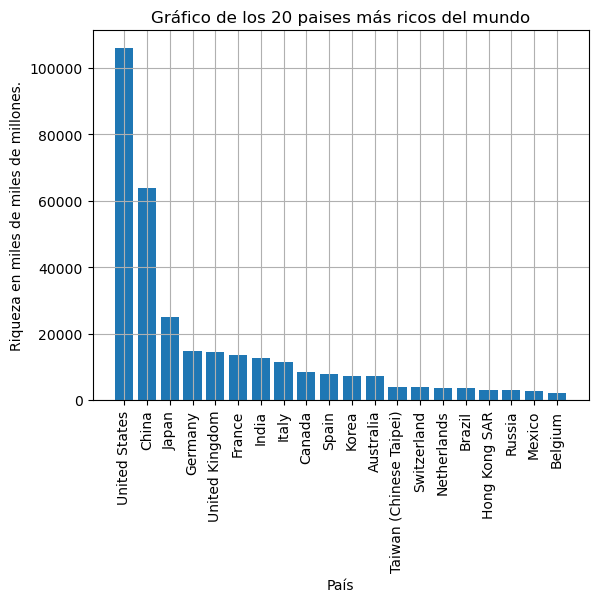

In [9]:
plt.style.use('default')
plt.xticks(rotation = 90)
plt.bar(dftop20['Country'],dftop20['Wealth'])
plt.grid()
plt.title('Gráfico de los 20 paises más ricos del mundo')
plt.xlabel('País')
plt.ylabel('Riqueza en miles de miles de millones.')

## Gráfico de pastel de los 10 paises(si existen) más ricos por cada región.

In [10]:
dfRegiones = df.copy()
regiones = dfRegiones[~dfRegiones.isna()]['Region'].unique()
regiones

array(['North America', 'China', 'Asia-Pacific', 'Europe', 'India',
       'Latin America', 'Africa', nan], dtype=object)

C:\Users\Orlando\AppData\Local\Temp/ipykernel_47624/3925652729.py:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[i,j].pie(dfRegionTmp['Wealth'],labels=dfRegionTmp['Country'], autopct='%1.0f%%')


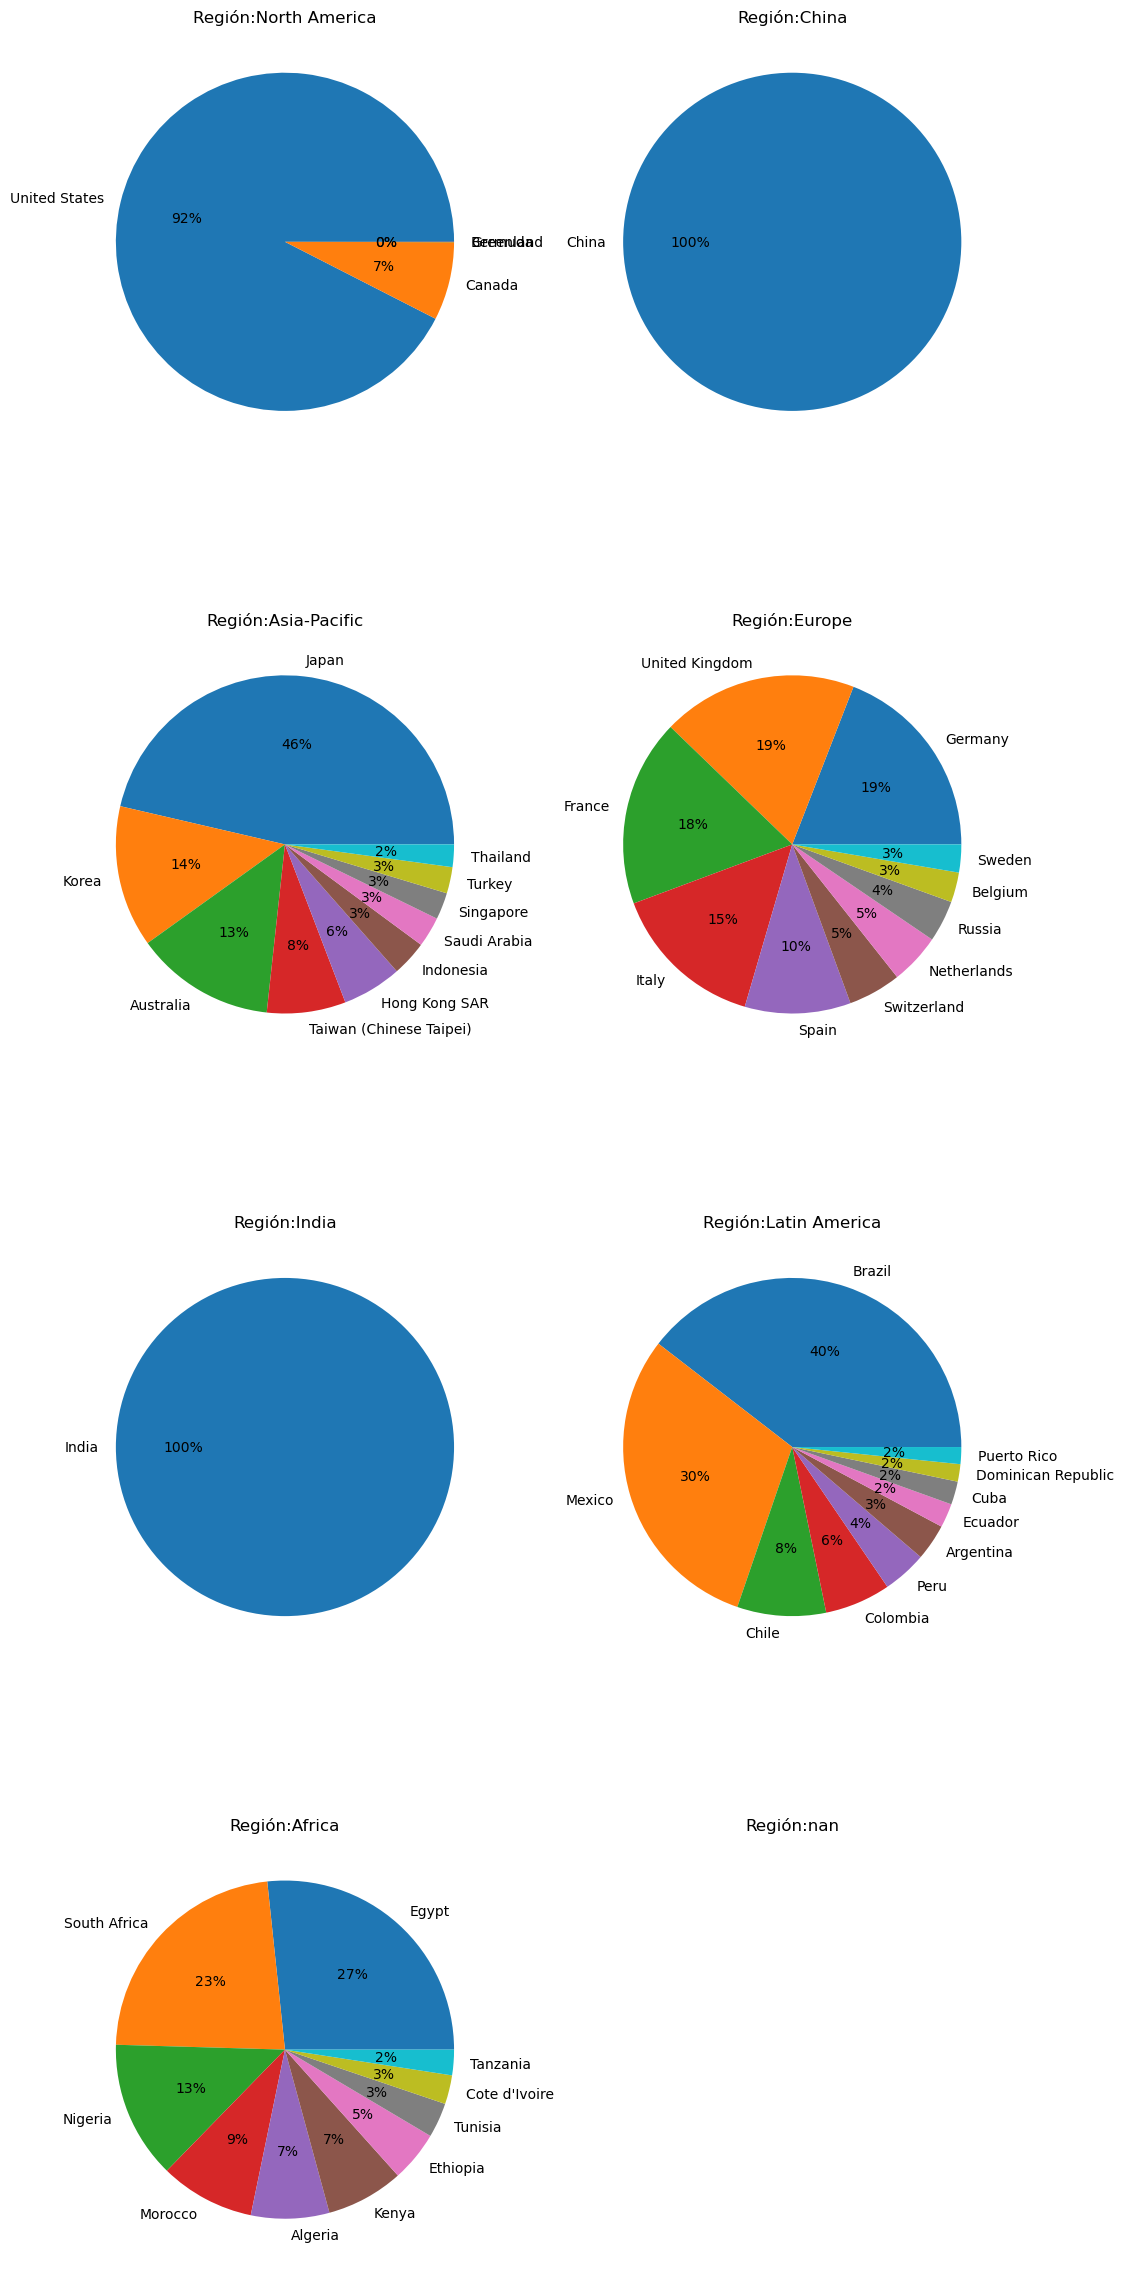

In [11]:
nCols = 2 #Número de columnas definido estáticamente
nRows = math.ceil(len(regiones)/nCols) # Obtiene el número de columnas necesarias
fig, ax = plt.subplots(nRows,nCols, figsize=(12,30))

i=0
j=0

plt.xticks(rotation=90)
for region in regiones:
    filtroRegion = dfRegiones['Region'] == region
    filtroIsnaWealth = df['Wealth'].isna()
    dfRegionTmp = dfRegiones[filtroRegion & ~filtroIsnaWealth].sort_values('Wealth',ascending=False).head(10)
    ax[i,j].autoscale(enable=True)
    
    ax[i,j].pie(dfRegionTmp['Wealth'],labels=dfRegionTmp['Country'], autopct='%1.0f%%')
    ax[i,j].set_title('Región:' + str(region))
    xticks = ax[i,j].get_xticklabels()
    if len(xticks) >3:
        for tick in xticks:
            tick.set_rotation(90)

    j = (j+1) % nCols
    if j == 0:
        i += 1


## Gráfico de pastel y porcentajes de la riqueza del mundo por regiones

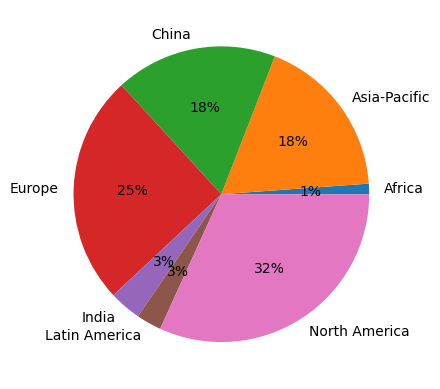

In [12]:
# Obtiene la riqueza regional mediante la agrupación por regiones
# para posteriormente sumar la riqueza de cada grupo
regionWealth = df.groupby('Region').sum('Wealth')
fig, ax = plt.subplots(1,1) # Se define un único subplot
ax.pie(regionWealth['Wealth'], labels=regionWealth.index, autopct='%1.0f%%'); # Gráfico de pastel o pie de la riqueza regional 

## Porcentaje acumulado de los paises más ricos
Mediante este gráfico se puede observar como se reparte la riqueza de acuerdo al número de paises, ordenado de más ricos a más pobres.

In [13]:
dfPorcentual = df[~df['Wealth'].isna()].sort_values('Wealth',ascending=False)
sumaTotalRiqueza = dfPorcentual['Wealth'].sum()
dfPorcentual['porcentaje'] = dfPorcentual['Wealth'] / sumaTotalRiqueza
dfPorcentual['porcentajeAcumulado'] = dfPorcentual['porcentaje'].cumsum()
dfPorcentual.head(3)

,Country,Region,Wealth,porcentaje,porcentajeAcumulado
0,United States,North America,105990.0,0.294030,0.294030
1,China,China,63827.0,0.177064,0.471094
2,Japan,Asia-Pacific,24992.0,0.069331,0.540425


(0.0, 214.2)

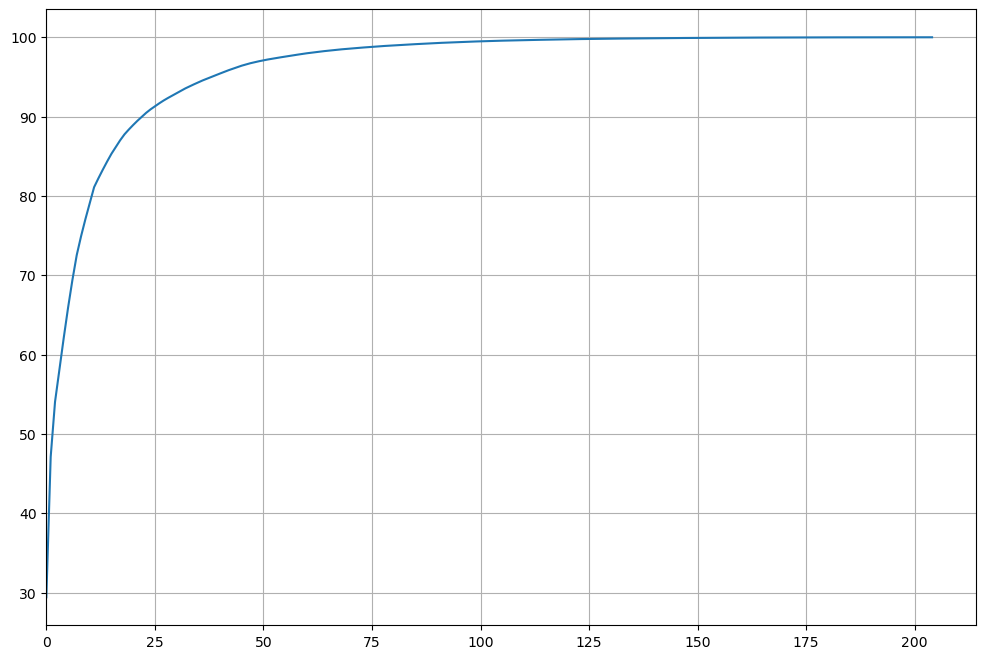

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(dfPorcentual['porcentajeAcumulado'].values*100);
ax.grid()
ax.set_xlim(left=0)

## Gráfico de la riqueza agrupada Regiones realizado con la librería Ploty
Para visualizar el gráfico abrir el archivo "regionalWealth.html"

In [15]:
import plotly.express as px
df = px.data.gapminder()
regionWealth['Region'] = regionWealth.index
regionWealth = regionWealth.sort_values('Wealth',ascending=False)
print(regionWealth.dtypes)
fig = px.bar(regionWealth, x="Region", y="Wealth", text_auto='.2s')
fig.show()
fig.write_html("regionalWealth.html")


Wealth    float64
Region     object
dtype: object
